In [1]:
import os
os.makedirs("../reports", exist_ok=True)

Columns: Index(['date', 'product', 'quantity', 'price', 'customer_id', 'region',
       'total_sales'],
      dtype='object')

DAY 1 - Descriptive Statistics
Mean: 4.78
Median: 5.0
Mode: 4
Standard Deviation: 2.59
Variance: 6.7

DAY 2 - Distribution Analysis


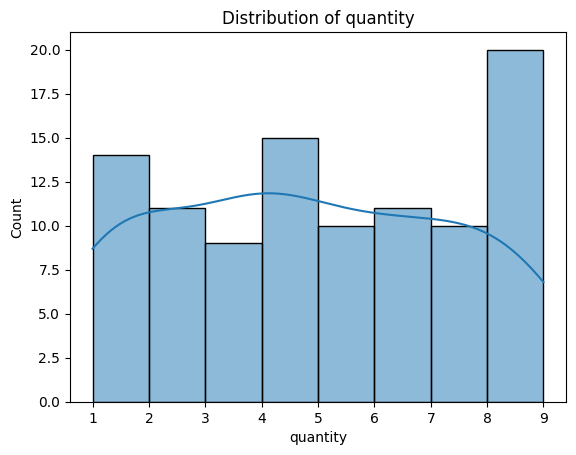


DAY 3 - Correlation Analysis
             quantity     price  total_sales
quantity     1.000000  0.008014     0.688107
price        0.008014  1.000000     0.646131
total_sales  0.688107  0.646131     1.000000


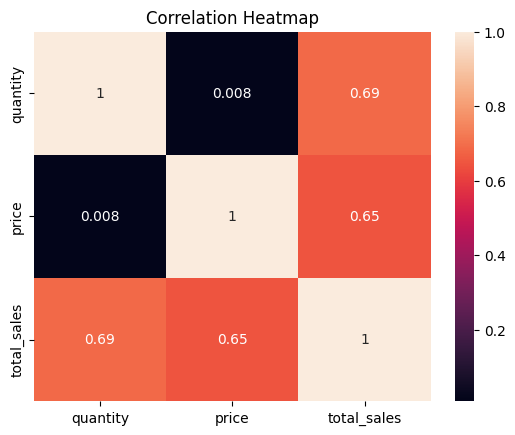


DAY 4 - Hypothesis Testing
Correlation: 0.008
T-statistic: 0.0793
No strong statistical evidence.
File saved successfully.

DAY 5 - Confidence Interval
95% Confidence Interval: 4.27 to 5.29
Margin of Error: 0.51

DAY 6 - Regression Analysis
Slope: 0.0
Intercept: 4.7411
R-squared: 0.0001


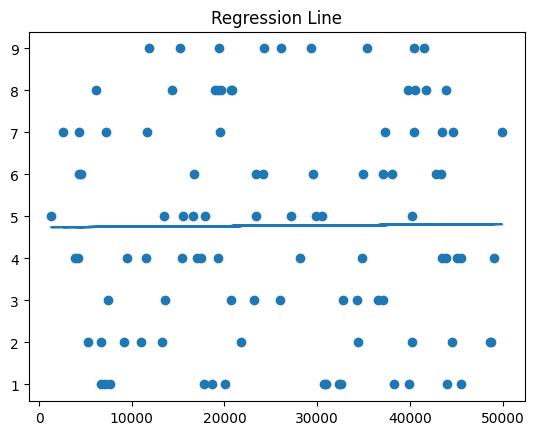


DAY 7 - Business Insights
Average: 4.78
Std Dev: 2.59
Confidence Interval: 4.27 to 5.29
Correlation: 0.008
R-squared: 0.0001


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/sales_data.csv")
df.columns = df.columns.str.strip().str.lower()

print("Columns:", df.columns)

numeric_cols = df.select_dtypes(include=['number']).columns

if len(numeric_cols) == 0:
    raise ValueError("No numeric columns found.")

sales_column = numeric_cols[0]

# =========================
# DAY 1 – Descriptive Statistics
# =========================
print("\nDAY 1 - Descriptive Statistics")

mean_sales = df[sales_column].mean()
median_sales = df[sales_column].median()
mode_sales = df[sales_column].mode()[0]
std_sales = df[sales_column].std()
variance_sales = df[sales_column].var()

print("Mean:", round(mean_sales, 2))
print("Median:", round(median_sales, 2))
print("Mode:", round(mode_sales, 2))
print("Standard Deviation:", round(std_sales, 2))
print("Variance:", round(variance_sales, 2))

# =========================
# DAY 2 – Distribution Analysis
# =========================
print("\nDAY 2 - Distribution Analysis")

plt.figure()
sns.histplot(df[sales_column], kde=True)
plt.title("Distribution of " + sales_column)
plt.show()

# =========================
# DAY 3 – Correlation Analysis
# =========================
print("\nDAY 3 - Correlation Analysis")

correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

plt.figure()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()

# =========================
# DAY 4 – Hypothesis Testing (Manual t-test logic)
# =========================
print("\nDAY 4 - Hypothesis Testing")

if len(numeric_cols) > 1:
    predictor = numeric_cols[1]
    
    r = df[sales_column].corr(df[predictor])
    n = len(df)

    t_stat = r * np.sqrt((n - 2) / (1 - r**2))

    print("Correlation:", round(r, 4))
    print("T-statistic:", round(t_stat, 4))

    if abs(t_stat) > 2:
        print("Statistically significant relationship (approx).")
    else:
        print("No strong statistical evidence.")
else:
    print("Not enough numeric columns for hypothesis testing.")

import os

os.makedirs("../reports", exist_ok=True)

with open("../reports/hypothesis_tests_results.txt", "w") as f:
    f.write("HYPOTHESIS TEST RESULTS\n")
    f.write("========================\n")
    f.write("Correlation: " + str(r) + "\n")
    f.write("T-statistic: " + str(t_stat) + "\n")

print("File saved successfully.")

# =========================
# DAY 5 – Confidence Interval
# =========================
print("\nDAY 5 - Confidence Interval")

z = 1.96
margin_error = z * (std_sales / np.sqrt(len(df)))

lower = mean_sales - margin_error
upper = mean_sales + margin_error

print("95% Confidence Interval:", round(lower, 2), "to", round(upper, 2))
print("Margin of Error:", round(margin_error, 2))

# =========================
# DAY 6 – Simple Regression (Manual Calculation)
# =========================
print("\nDAY 6 - Regression Analysis")

if len(numeric_cols) > 1:
    x = df[predictor]
    y = df[sales_column]

    slope = np.cov(x, y)[0,1] / np.var(x)
    intercept = y.mean() - slope * x.mean()

    y_pred = intercept + slope * x

    ss_total = np.sum((y - y.mean())**2)
    ss_residual = np.sum((y - y_pred)**2)

    r_squared = 1 - (ss_residual / ss_total)

    print("Slope:", round(slope, 4))
    print("Intercept:", round(intercept, 4))
    print("R-squared:", round(r_squared, 4))

    plt.figure()
    plt.scatter(x, y)
    plt.plot(x, y_pred)
    plt.title("Regression Line")
    plt.show()

# =========================
# DAY 7 – Business Insights
# =========================
print("\nDAY 7 - Business Insights")

print("Average:", round(mean_sales, 2))
print("Std Dev:", round(std_sales, 2))
print("Confidence Interval:", round(lower, 2), "to", round(upper, 2))

if len(numeric_cols) > 1:
    print("Correlation:", round(r, 4))
    print("R-squared:", round(r_squared, 4))
    

In [3]:
file_path = "../reports/hypothesis_tests_results.txt"

import os
os.makedirs("../reports", exist_ok=True)

with open(file_path, "w") as f:
    f.write("HYPOTHESIS TEST RESULTS\n")
    f.write("========================\n")
    f.write("Correlation: " + str(r) + "\n")
    f.write("T-statistic: " + str(t_stat) + "\n")